
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


## My comments may not necessarily be pythonic but are there to refine my thought process so I can get better at learning the "why's" instead of just the "how's", so please bear  with me. Thank you.

In [78]:
#Load libraries
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load data in dataframe
file = ('train.csv')
original_df = pd.read_csv(file)
data_df = original_df.copy() #creates a copy of original df
data_df_not_typecast = original_df.copy()

In [3]:
#view the first 5 rows to get an idea of the data we are looking at
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Find the average age of those who survived and those who did not...
#describe gives us summary statistics but doesn't quite 'isolate' the variables we want
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#we are getting warmer but how do we index this dataframe to pull out the values we want?
#for that we shall turn to df.loc (explicit indexing)
age_survived_or_not_df = data_df.groupby('Survived')['Age'].describe()
age_survived_or_not_df

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [6]:
#mean age of survived and did not survive
mean_did_not_survive = age_survived_or_not_df.loc[0, 'mean']
mean_did_survive = age_survived_or_not_df.loc[1, 'mean']
print(f'The mean age of those who DID NOT survive is {round(mean_did_not_survive, 2)} years old')
print(f'The mean age of those who DID survive is {round(mean_did_survive, 2)} years old')

The mean age of those who DID NOT survive is 30.63 years old
The mean age of those who DID survive is 28.34 years old



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: title={'center': 'Count of missing values'}>

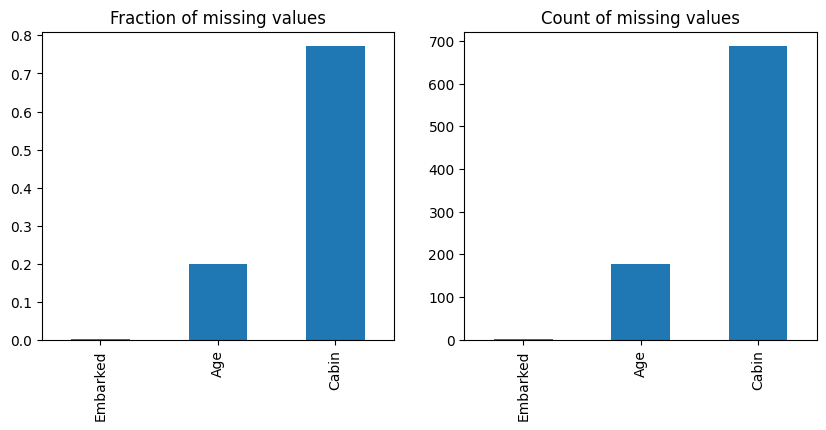

In [7]:
# 1. Create a bar chart showing how many missing values are in each column
# Question 1 Answer

print(data_df.isnull().sum()) #prints the count of null values for each column
                              #returns a scalar so has only 1 datatype, important
                              #because pandas plot.bar method will only use numeric
                              #'columns' unless specified, moral for future: not knowing 
                              #the return value of method calls has given me many problems!

fig, ax = plt.subplots(1,2, figsize=(10, 4)) #later we will pass ax into .plot to create our 2 barcharts

#barchart of missing counts as a fraction (1.0 being the max)
data_df[['Embarked','Age','Cabin']].isnull().mean().abs().plot.bar(ax=ax[0],
                                                                  title='Fraction of missing values') 

#barchart of missing counts as absolute frequency
data_df[['Embarked','Age','Cabin']].isnull().sum().plot.bar(ax=ax[1],
                                                           title='Count of missing values')

#embarked has tiny height due to relatively small value

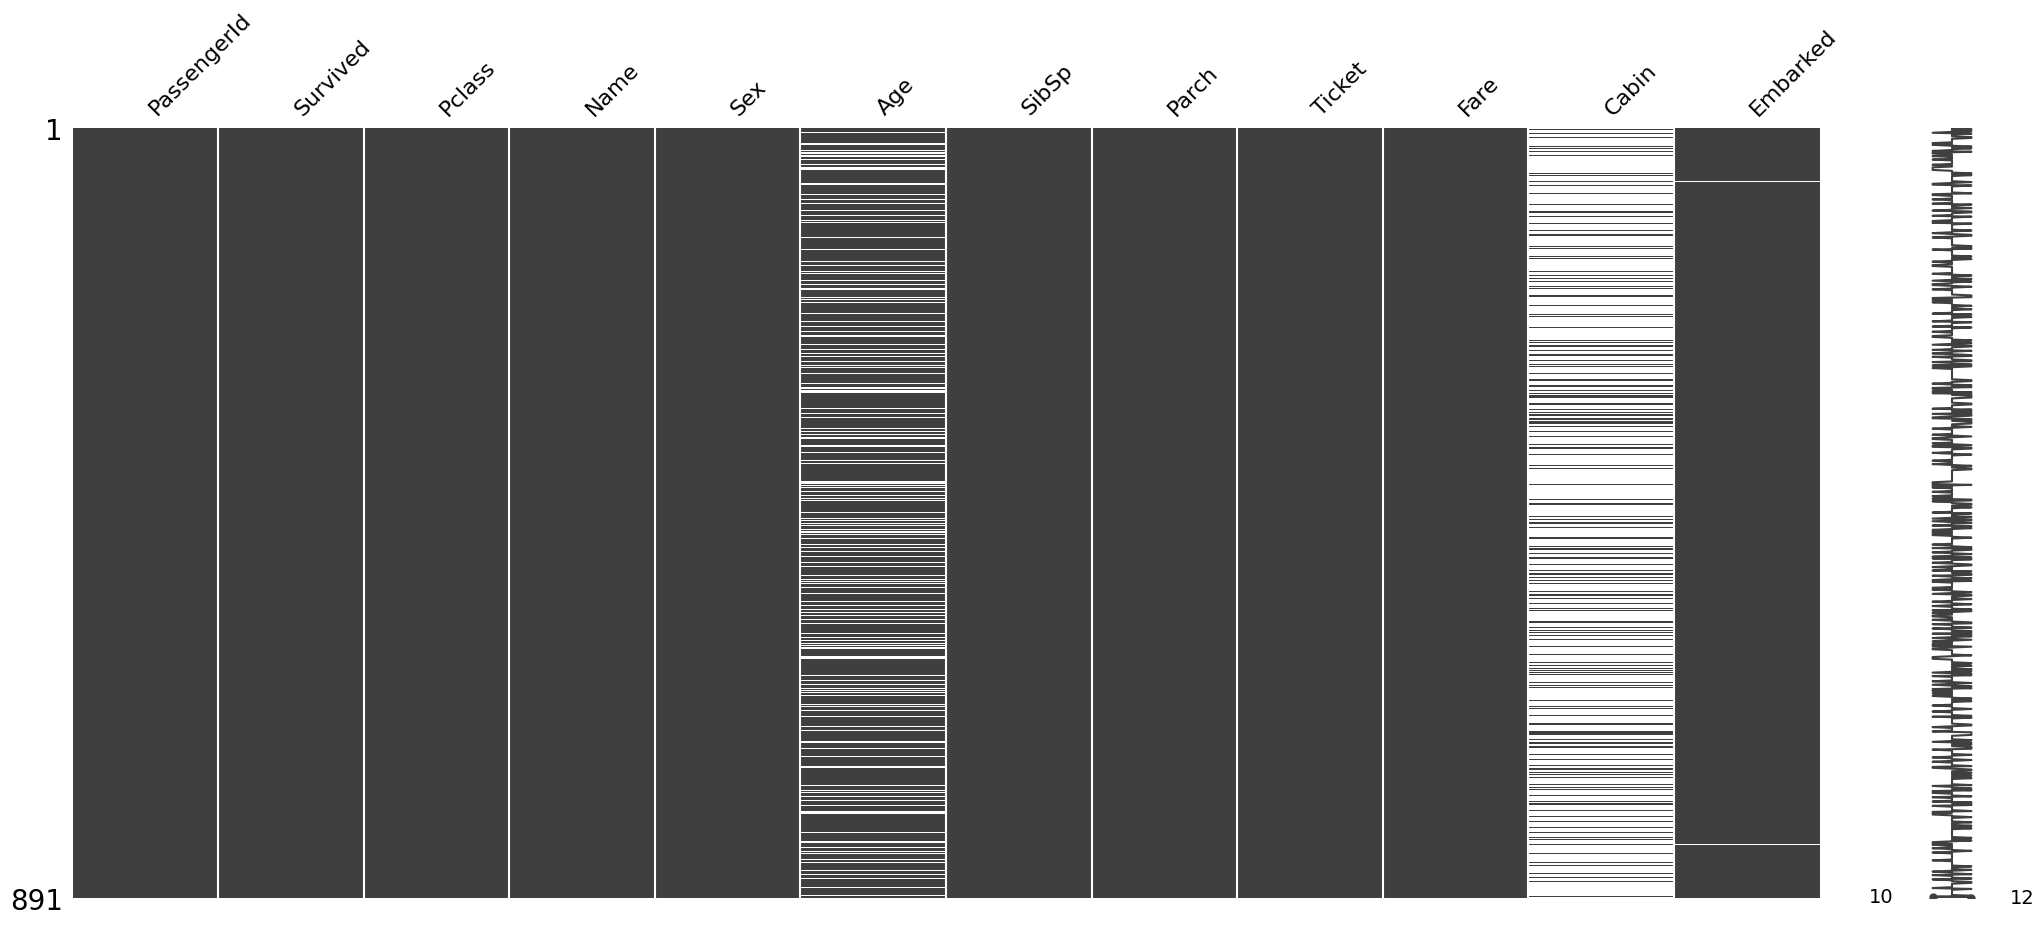

In [8]:
# For BONUS.. this is just to test out the missingno library
# we can see that most of the missing values are in cabin, followed by age, while embarked has just TWO missing values
ax = msno.matrix(data_df)

In [9]:
# 2. Which column has the most NaN values? How many cells in that column are empty?
# Question 2 Answer
missing_cabin_no = data_df.isnull().sum()['Cabin']
print(f'Cabin has the most NaN with a count of {missing_cabin_no}')

Cabin has the most NaN with a count of 687


In [10]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# 3. Delete all rows where Embarked is empty
# Question 3 Answer, 2 rows have been dropped
data_df = data_df.dropna(subset = 'Embarked')
print(data_df.describe(include='all'))
data_df.isnull().sum()
#we can verify from the count that 2 rows have been dropped
#and that embarked has no missing values left

        PassengerId    Survived      Pclass                     Name   Sex  \
count    889.000000  889.000000  889.000000                      889   889   
unique          NaN         NaN         NaN                      889     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.382452    2.311586                      NaN   NaN   
std      256.998173    0.486260    0.834700                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      224.000000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.000000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# 4. Fill all empty cabins with ¯\(ツ)/¯
# Question 4 Answer
data_df.loc[:, 'Cabin'] = data_df['Cabin'].fillna('¯\(ツ)/¯')
data_df['Cabin'].value_counts()
#value counts of '¯\(ツ)/¯' tallies with the missing values of cabin

Cabin
¯\(ツ)/¯        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [13]:
#1. There are two columns that pertain to how many family members are on the boat for a given person. 
#Create a new column called FamilyCount which will be the sum of those two columns.
#Answer to question 1
data_df.loc[:, 'FamilyCount'] = data_df['SibSp'] + data_df['Parch']

In [14]:
#We can see that the FamilyCount column has been populated 
data_df['FamilyCount'].value_counts()

FamilyCount
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [15]:
#2. Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
#Answer to question 2
data_df.loc[:, 'IsReverend'] = data_df['Name'].apply(lambda x: 1 if 'Rev.' in x else 0) 

In [16]:
#We can see that the IsReverend column has been created and populated
data_df['IsReverend'].value_counts()

IsReverend
0    883
1      6
Name: count, dtype: int64

In [17]:
data_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilyCount      int64
IsReverend       int64
dtype: object

In [18]:
#3. In order to feed our training data into a classification algorithm, 
#we need to convert our categories into 1's and 0's using pd.get_dummies
#Answer to question 3
data_df_column_dummies = pd.get_dummies(data_df, columns = ['Embarked'], dtype=int)

In [19]:
#We can see that the relevant dummy columns have been created for embarked
data_df_column_dummies.iloc[:5, 5:]

,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [20]:
#Answer to question 3 (for sex)
data_df_sex_dummies = pd.get_dummies(data_df, columns = ['Sex'], dtype=int)

In [21]:
#We can see that the relevant dummy columns have been created for sex 
data_df_sex_dummies.iloc[:5, 5:]

,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,0
3,1,0,113803,53.1000,C123,S,1,0,1,0
4,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1


In [22]:
#BONUS: Extract the title from everyone's name and create dummy columns
#Answer to BONUS question
data_df['Name_title'] = data_df['Name'].str.extract("([A-Za-z]+)\.", expand=False)
data_df_name_title_dummies = pd.get_dummies(data_df, columns=['Name_title'])


In [23]:
# let's take a look at our name_title dummy columns
print(data_df_name_title_dummies.dtypes)
data_df_name_title_dummies.iloc[:5, 14:]

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                object
FamilyCount              int64
IsReverend               int64
Name_title_Capt           bool
Name_title_Col            bool
Name_title_Countess       bool
Name_title_Don            bool
Name_title_Dr             bool
Name_title_Jonkheer       bool
Name_title_Lady           bool
Name_title_Major          bool
Name_title_Master         bool
Name_title_Miss           bool
Name_title_Mlle           bool
Name_title_Mme            bool
Name_title_Mr             bool
Name_title_Mrs            bool
Name_title_Ms             bool
Name_title_Rev            bool
Name_title_Sir            bool
dtype: object


,Name_title_Capt,Name_title_Col,Name_title_Countess,Name_title_Don,Name_title_Dr,Name_title_Jonkheer,Name_title_Lady,Name_title_Major,Name_title_Master,Name_title_Miss,Name_title_Mlle,Name_title_Mme,Name_title_Mr,Name_title_Mrs,Name_title_Ms,Name_title_Rev,Name_title_Sir
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [24]:
#this creates the desired dummy columns in the same dataframe
data_df = pd.get_dummies(data_df, columns = ['Embarked'], dtype=int)
data_df = pd.get_dummies(data_df, columns = ['Sex'], dtype=int)
data_df = pd.get_dummies(data_df, columns=['Name_title'])
print(data_df.dtypes)
#examining first 5 rows of our newly created columns
print(data_df.iloc[:5, 10:])

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
FamilyCount              int64
IsReverend               int64
Embarked_C               int32
Embarked_Q               int32
Embarked_S               int32
Sex_female               int32
Sex_male                 int32
Name_title_Capt           bool
Name_title_Col            bool
Name_title_Countess       bool
Name_title_Don            bool
Name_title_Dr             bool
Name_title_Jonkheer       bool
Name_title_Lady           bool
Name_title_Major          bool
Name_title_Master         bool
Name_title_Miss           bool
Name_title_Mlle           bool
Name_title_Mme            bool
Name_title_Mr             bool
Name_title_Mrs            bool
Name_title_Ms             bool
Name_tit

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

## There are 2 answers because I first did the lab without a proper understanding of groupby (sorry no excel experience!) But after I saw another example I realised 'huh, so that's how it works.' Therefore I have included the shorter code also, while commenting out the longer code

In [25]:
#checking datatypes
original_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# defining a function take takes in a numerator and denominator and converts into a percentage
# def make_percent(numerator, denominator):
#     ratio = numerator / (numerator + denominator)
#     return f'{round(ratio * 100, 2)}%'

In [27]:
#1.What was the survival rate overall?
#Answer to question 1
# dead = original_df.groupby('Survived')['Survived'].count()[0]
# survived = original_df.groupby('Survived')['Survived'].count()[1]
# make_percent(survived, dead)

In [28]:
#1. simple is better than complex!
print(f"Overall survival is {round(original_df['Survived'].mean() * 100, 2)}%")

Overall survival is 38.38%


In [29]:
#2.Which gender fared the worst? What was their survival rate?
#Answer to question 2
# male_vs_female_survival = original_df.groupby('Survived')['Sex'].value_counts()
# dead_males = male_vs_female_survival[0]['male']
# dead_females = male_vs_female_survival[0]['female']
# survived_males = male_vs_female_survival[1]['male']
# survived_females = male_vs_female_survival[1]['female']

# print(f'Male survival rate is {make_percent(survived_males, dead_males)}')
# print(f'Female survival rate is {make_percent(survived_females, dead_females)}')

In [30]:
#2. so many less lines!
print(f"Female survival is {round(original_df.groupby('Sex')['Survived'].mean()[0] * 100, 2)}%")
print(f"Male survival is {round(original_df.groupby('Sex')['Survived'].mean()[1] * 100, 2)}%")

Female survival is 74.2%
Male survival is 18.89%


In [31]:
#3.What was the survival rate for each Pclass?
#Answer to question 3
# pclass_survival = original_df.groupby('Survived')['Pclass'].value_counts()
# survived_pclass1 = pclass_survival[1][1]
# dead_pclass1 = pclass_survival[0][1]
# survived_pclass2 = pclass_survival[1][2]
# dead_pclass2 = pclass_survival[0][2]
# survived_pclass3 = pclass_survival[1][3]
# dead_pclass3 = pclass_survival[0][3]

# print(f'The survival rate for class 1 is {make_percent(survived_pclass1, dead_pclass1)}')
# print(f'The survival rate for class 2 is {make_percent(survived_pclass2, dead_pclass2)}')
# print(f'The survival rate for class 3 is {make_percent(survived_pclass3, dead_pclass3)}')

In [32]:
#3. what a great shortcut!
print(f"Class 1 survival is {round(original_df.groupby('Pclass')['Survived'].mean()[1] * 100, 2)}%")
print(f"Class 2 survival is {round(original_df.groupby('Pclass')['Survived'].mean()[2] * 100, 2)}%")
print(f"Class 3 survival is {round(original_df.groupby('Pclass')['Survived'].mean()[3] * 100, 2)}%")

Class 1 survival is 62.96%
Class 2 survival is 47.28%
Class 3 survival is 24.24%


In [33]:
#4.Did any reverends survive? How many?
#Answer to question 4 
# reverend_did_not_survive = data_df.groupby('Survived')['IsReverend'].value_counts()[0][1]
# print(f'No reverends survived, in fact {reverend_did_not_survive} did not survive')

In [34]:
#4. simpler
print(f"Reverend survival is {round(data_df.groupby('IsReverend')['Survived'].mean()[1] * 100, 2)}%, hence 0 survived")


Reverend survival is 0.0%, hence 0 survived


In [35]:
# 5.What is the survival rate for cabins marked ¯\(ツ)/¯
#Answer to question 5
# mask = data_df['Cabin'] == '¯\(ツ)/¯'
# cabin_survival = data_df[mask].groupby('Cabin')['Survived'].value_counts()
# cabin_survived = cabin_survival[1]
# cabin_dead = cabin_survival[0]
# print(f'The survival rate for the unknown cabins is {make_percent(cabin_survived, cabin_dead)}')

In [36]:
#5. so much cleaner
mask = data_df['Cabin'] == '¯\(ツ)/¯'
print(f"'¯\(ツ)/¯' survival is {round(data_df[mask].groupby('Cabin')['Survived'].mean()[0] * 100, 2)}%")

'¯\(ツ)/¯' survival is 29.99%


In [37]:
#checking proportion of empty values
original_df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [38]:
#6.What is the survival rate for people whose Age is empty?
#Answer to question 6 
# age_null_mask = original_df['Age'].isnull()
# null_age_df = original_df[age_null_mask]
# null_age_df.loc[:, 'Age'] = 1
# empty_age_survival = null_age_df.groupby('Survived')['Age'].value_counts()

# survived_empty_age = empty_age_survival[1][1.0]
# dead_empty_age =  empty_age_survival[0][1.0]
# print(f'The survival rate for unknown ages is {make_percent(survived_empty_age, dead_empty_age)}')

In [39]:
#6. 2nd method 
age_null_mask = original_df['Age'].isnull()
null_age_df = original_df[age_null_mask]
null_age_df.loc[:, 'Age'] = 1 #putting a dummy value as a place holder so that we can use the mean method properly
print(f"Unknown age survival is {round(null_age_df.groupby('Age')['Survived'].mean()[1] * 100, 2)}%")

Unknown age survival is 29.38%


In [40]:
#7.What is the survival rate for each port of embarkation?
# Answer to question 7 embarked_q
# embarked_q_survival = data_df_column_dummies.groupby(['Embarked_Q', 'Survived'])['Survived'].value_counts()[1]
# survived_embarked_q = embarked_q_survival[1]
# dead_embarked_q = embarked_q_survival[0]
# print(f'The survival rate for embarked_q is {make_percent(survived_embarked_q, dead_embarked_q)}')

#Answer to question 7 embarked_c
# embarked_c_survival = data_df_column_dummies.groupby(['Embarked_C', 'Survived'])['Survived'].value_counts()[1]
# survived_embarked_c = embarked_c_survival[1]
# dead_embarked_c = embarked_c_survival[0]
# print(f'The survival rate for embarked_c is {make_percent(survived_embarked_c, dead_embarked_c)}')

#Answer to question 7 embarked_s
# embarked_s_survival = data_df_column_dummies.groupby(['Embarked_S', 'Survived'])['Survived'].value_counts()[1]
# survived_embarked_s = embarked_s_survival[1]
# dead_embarked_s = embarked_s_survival[0]
# print(f'The survival rate for embarked_s is {make_percent(survived_embarked_s, dead_embarked_s)}')

In [41]:
#7. A much shorter and cleaner method
print(f"The survival for embarked_Q {round(data_df_column_dummies.groupby('Embarked_Q')['Survived'].mean()[1] * 100, 2)}%")
print(f"The survival for embarked_C {round(data_df_column_dummies.groupby('Embarked_C')['Survived'].mean()[1] * 100, 2)}%")
print(f"The survival for embarked_S {round(data_df_column_dummies.groupby('Embarked_S')['Survived'].mean()[1] * 100, 2)}%")

The survival for embarked_Q 38.96%
The survival for embarked_C 55.36%
The survival for embarked_S 33.7%


In [42]:
#8.What is the survival rate for children (under 12) in each Pclass?
#Answer to question 8
# age_mask_under_12 = original_df['Age'] < 12
# age_under_12_df = original_df[age_mask_under_12]
# children_survival = age_under_12_df.groupby(['Pclass', 'Survived'])['Survived'].value_counts()
# survived_child_pclass1 = children_survival[1][1]
# dead_child_pclass1 = children_survival[1][0]
# survived_child_pclass2 = children_survival[2][1]
# survived_child_pclass3 = children_survival[3][1]
# dead_child_pclass3 = children_survival[3][0]

# print(f'The survival rate for children under the age of 12 in pclass1 is {make_percent(survived_child_pclass1, dead_child_pclass1)}')
# print(f'The survival rate for children under the age of 12 in pclass2 is 100%')
# print(f'The survival rate for children under the age of 12 in pclass3 is {make_percent(survived_child_pclass3, dead_child_pclass3)}')

In [43]:
#8. shorter method
age_mask_under_12 = original_df['Age'] < 12
age_under_12_df = original_df[age_mask_under_12]
print(f"The survival for children in class 1 is {round(age_under_12_df.groupby(['Pclass'])['Survived'].mean()[1] * 100, 2)}%")
print(f"The survival for children in class 2 is {round(age_under_12_df.groupby(['Pclass'])['Survived'].mean()[2] * 100, 2)}%")
print(f"The survival for children in class 3 is {round(age_under_12_df.groupby(['Pclass'])['Survived'].mean()[3] * 100, 2)}%")

The survival for children in class 1 is 75.0%
The survival for children in class 2 is 100.0%
The survival for children in class 3 is 40.43%


In [44]:
#9. Did the captain of the ship survive? Is he on the list?
#Answer to question 9
print(data_df_name_title_dummies[data_df_name_title_dummies['Name_title_Capt'] == True]['Survived'])
print(f'The captain of the ship did not survive')

745    0
Name: Survived, dtype: int64
The captain of the ship did not survive


In [45]:
#10.Of all the people that died, who had the most expensive ticket? How much did it cost?
#Answer to question 10 
# print(original_df.groupby(['Survived'])['Fare'].value_counts()[0].tail())
# print(f'\nThe most expensive ticket for those who did not survive is 263')
# print('\n')
# print(original_df.loc[(original_df['Fare'] == 263), ['Name', 'Survived']])
# print(f"\n{original_df.loc[27, 'Name']} did not survive")
# print(f"\n{original_df.loc[438, 'Name']} did not survive")


In [46]:
#10. shorter code
print(f"The most expensive ticket of those who died is {original_df.groupby(['Survived'])['Fare'].max()[0]}")
print(f"{original_df[(original_df['Fare'] == original_df.groupby('Survived')['Fare'].max()[0]) & (original_df['Survived'] == 0)].loc[27, 'Name']} did not survive")
print(f"{original_df[(original_df['Fare'] == original_df.groupby('Survived')['Fare'].max()[0]) & (original_df['Survived'] == 0)].loc[438, 'Name']} did not survive")

The most expensive ticket of those who died is 263.0
Fortune, Mr. Charles Alexander did not survive
Fortune, Mr. Mark did not survive


In [47]:
#11.Does having family on the boat help or hurt your chances of survival?
#Answer to question 11
# print(data_df.groupby(['FamilyCount', 'Survived'])['Survived'].value_counts())
# print(data_df.pivot_table(values= 'Survived', index= 'FamilyCount')*100)
# print(f'\nFrom the data, survival rate for those with family size of 7 and 10 is 0.00%')
# print(f'\nFrom the data, survival rate is highest at 72.41% for a family size of 3')
# print(f'\nFrom the data, survival rate for those with no family (size=0) is 30.09%')
# print(f'\nTherefore having family increases your chance of survival up to a certain extent')

In [48]:
#11. shorter method
for i in range(0, 11):
    try:
        print(f"The survival rate for {i} family members is {round(data_df.groupby('FamilyCount')['Survived'].mean()[i] *100, 2)}%")
    except:
        print(f"No survival rate for {i} family members")
print('\nHaving family increases the rate of survival up to 4 family members and above, except if one has 6 family members')

The survival rate for 0 family members is 30.09%
The survival rate for 1 family members is 55.28%
The survival rate for 2 family members is 57.84%
The survival rate for 3 family members is 72.41%
The survival rate for 4 family members is 20.0%
The survival rate for 5 family members is 13.64%
The survival rate for 6 family members is 33.33%
The survival rate for 7 family members is 0.0%
No survival rate for 8 family members
No survival rate for 9 family members
The survival rate for 10 family members is 0.0%

Having family increases the rate of survival up to 4 family members and above, except if one has 6 family members


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


### I realise I did not create charts that show survival rate as a % or proportion, but created many charts that plot survived/dead against most variables

In [49]:
#Let's take a look at the first 5 rows of our original dataframe again and also reexamine the column names
print(original_df.head())
print(original_df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

### Some of the columns will not be very useful for plotting/visualization. Also some of the columns such as "Survived" and "Pclass" are cast as int which may be problematic when we do our plotting, so we can recast their datatypes to categorical

In [50]:
#re-examine datatypes
original_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### For better visibility I would like to take at look at the unique values to decide which may or may no be useful. Survived, Pclass, Name(at least for title), Age, SibSp, Parch, Fare, Embarked would likely have some (predictive value for survival), but if not performing classification, then would these variables have some relationship with each other or to themselves (like some variance instead of being uniform?). PassengerId, Cabin and Ticket can be disregarded for plotting

In [51]:
# # Uncomment to run this cell as the output is rather long

# for i in original_df.columns:
#     print(f"{i} \n {original_df[i].unique()}")


In [52]:
#Ideally the below 2 steps should be done under data cleaning

#Type casting Survived, Pclass, Embarked into categorical
original_df = original_df.astype({'Survived':'category', 'Pclass':'category', 'Embarked':'category'})

In [53]:
print(original_df['Survived'].unique())
#Rename Survived column with more meaningful names
original_df['Survived'] = original_df['Survived'].cat.rename_categories(['Dead','Survived'])

#dropping NaN values in Embarked column
original_df = original_df.dropna(subset = 'Embarked')

print(original_df['Embarked'].unique())
#rename embarked column with more meaninful names
original_df['Embarked'] = original_df['Embarked'].cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'])

print(original_df['Pclass'].unique())
#rename Pclass column with more meaninful names
original_df['Pclass'] = original_df['Pclass'].cat.rename_categories(['Class_1', 'Class_2', 'Class_3'])

[0, 1]
Categories (2, int64): [0, 1]
['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']
[3, 1, 2]
Categories (3, int64): [1, 2, 3]


In [54]:
#Use seaborn defaults
sns.set_theme(font_scale=0.8)

### The dead outnumber the survived. We know this to be true given that the titanic did not have enough lifeboats

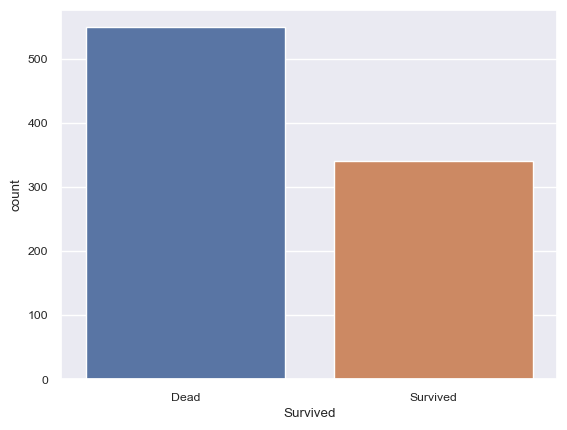

In [55]:
#countplot of survived vs dead
sns.countplot(data=original_df, x='Survived');

### But what about a count by gender? Dead males outnumber survived males, but the opposite is true for females. This likely reflect class attitudes at the beginning of the 20th century

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


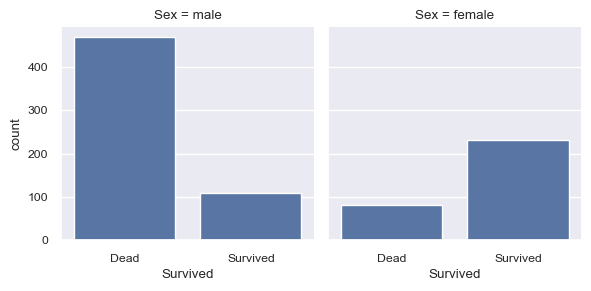

In [56]:
#Facetgrid for Survived by Sex
plot = sns.FacetGrid(original_df, col='Sex')
plot.map(sns.countplot, 'Survived');

### But what about a count by Pclass? Pclass_1 has more survivors than deaths, not surprising given what we know about class attitudes back then. These class attitudes are also reflected in the fact that deaths in Pclass_3 outnumber survivors by more than 3 times

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


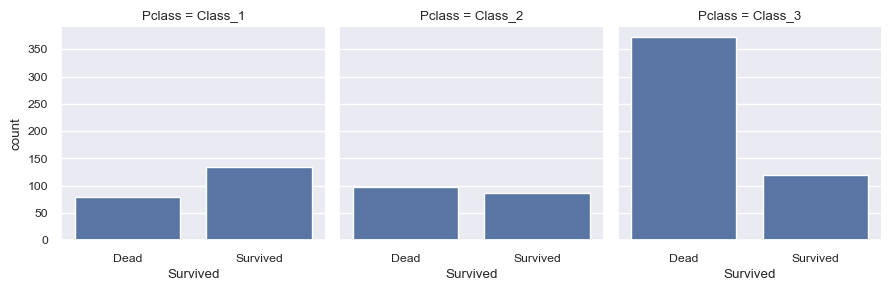

In [57]:
#Facetgrid for Survived by Pclass
plot = sns.FacetGrid(original_df, col='Pclass')
plot.map(sns.countplot, 'Survived');

### What about by port of embarkation? Most of the dead embarked at the English port of Southhamptom

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


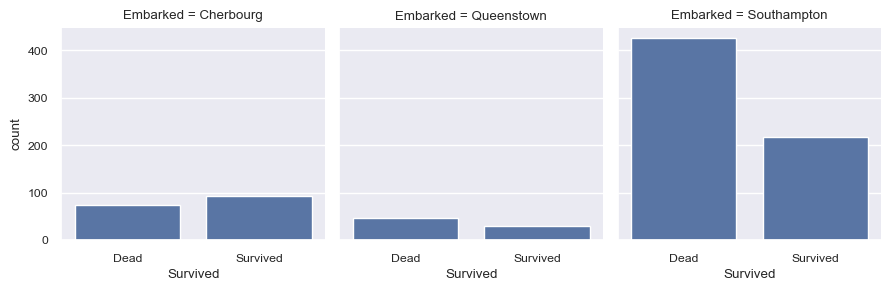

In [58]:
#Facetgrid for Survived by Embarked
plot = sns.FacetGrid(original_df, col='Embarked')
plot.map(sns.countplot, 'Survived');

### There are no Females in Pclass_1 that died, a few deaths for Pclass_2 and what appears to be almost equal survived/deaths for Pclass_3. But we cannot say the same for males! In all Pclasses, male deaths outnumber survivors with a big disparity between Pclass_3 males and the other 2 classes. We can definitely say males in Pclass_3 did not a have a good chance of surviving their voyage on the titanic...

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


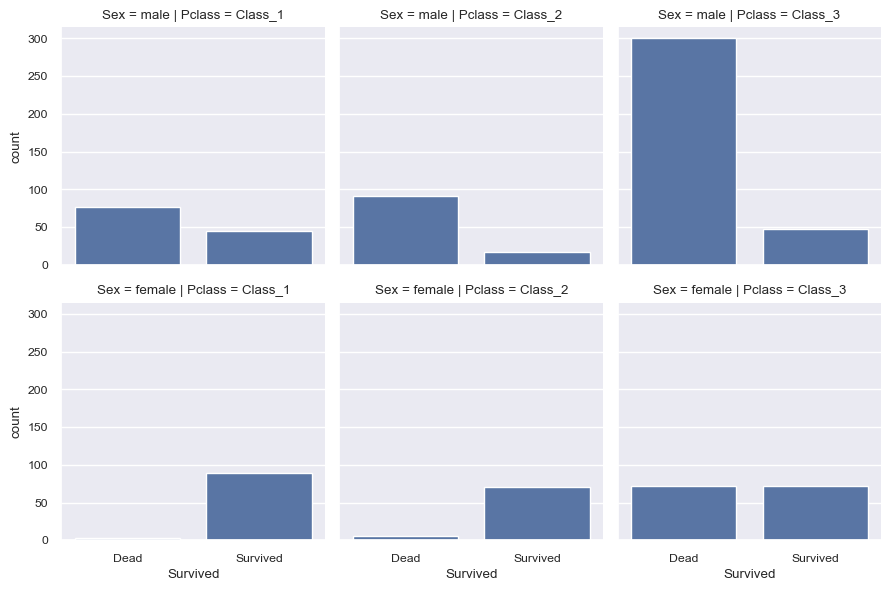

In [59]:
#Faceting by Sex and PClass against Survived, we get more interesting insights!
plot = sns.FacetGrid(original_df, row='Sex', col='Pclass')
plot.map(sns.countplot, 'Survived');

### Again female survivors outnumber deaths for all embarked ports, although there is a higher proportion of females deaths for southhamptom compared to the other 2 embarked ports. Also male deaths seem to be proportionately higher for southhamptom compared to the other 2 ports

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


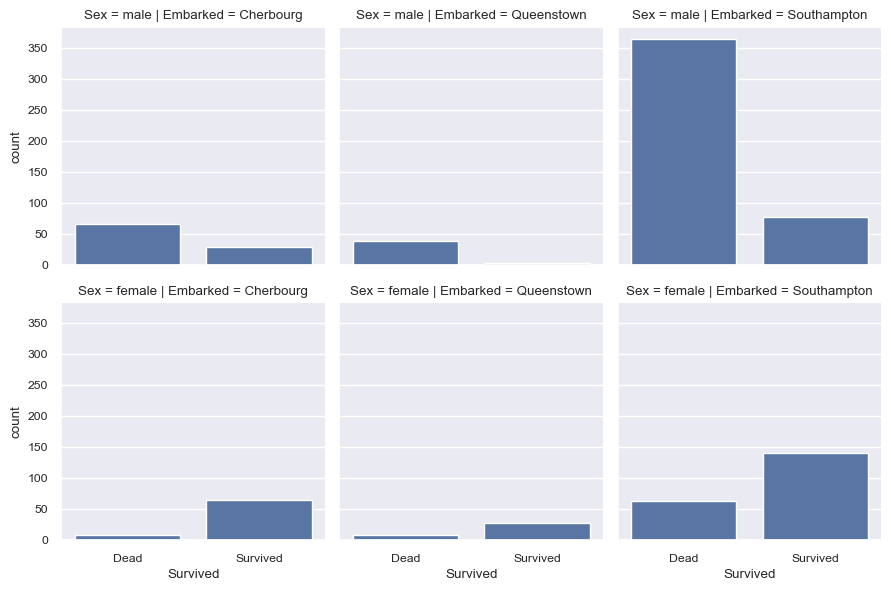

In [60]:
#Facetgrid for Embarked and Sex against Survived
plot = sns.FacetGrid(original_df, row='Sex', col='Embarked')
plot.map(sns.countplot, 'Survived');

### When plotting embarked with pclass, we can see there more pclass_3 embarked at southampton than for any other categorical value of Embarked and Pclass. This is also reflected in that almost 40% of our passengers are from pclass_3 AND southampton

C:\Users\Wes\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


39.70753655793026%


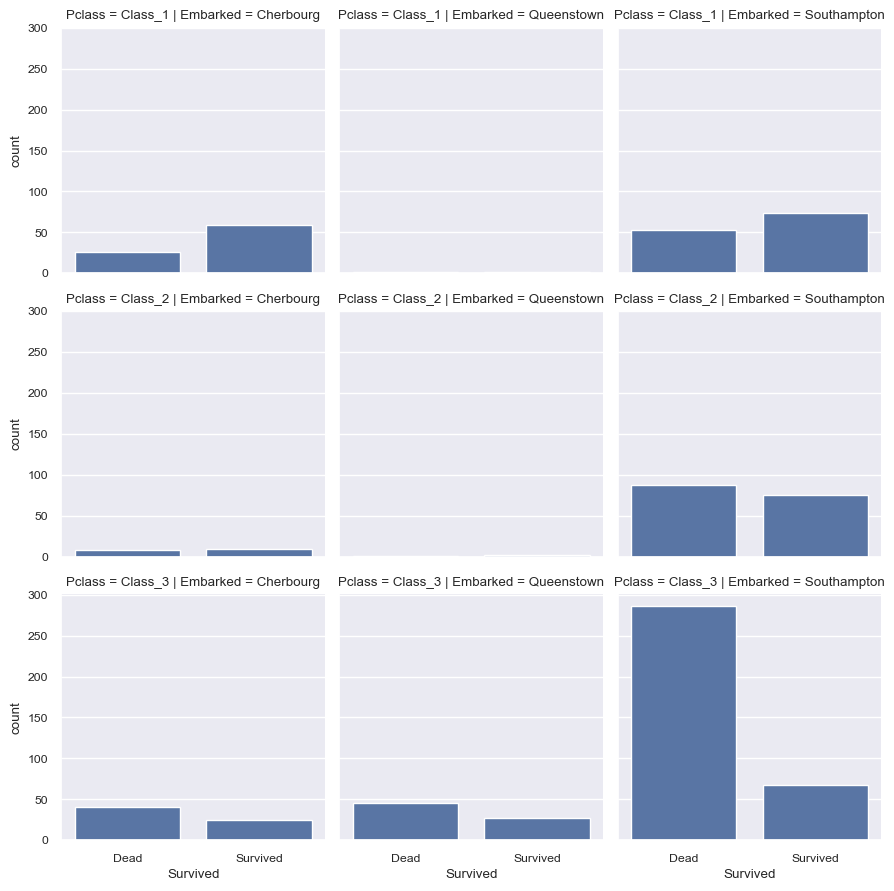

In [61]:
#Facetgrid for Embarked and Pclass against Survived
plot = sns.FacetGrid(original_df, col='Embarked', row='Pclass')
plot.map(sns.countplot, 'Survived')

#print percentage of deaths from Southampton and pclass_3
print(f"{original_df[(original_df['Pclass'] == 'Class_3') & (original_df['Embarked'] == 'Southampton')].shape[0] * 100 / original_df.shape[0]}%")


### A pairplot gives us the univariate and bivariate distributions for all pairs of variables passed into the function call. It is essentially a jointplot between every possible numerical variable. Marginal distributions come out as histograms or KDEs (for example, age) and joint distributions come out as scatterplot (age against fare)

### The pairplots confirm the findings from our earlier visualizations and also provide the insight to perform more visualisations on other variables of interest. We can replot Age for example as the KDE for age is rather small. Also a pairplot does not allow us to visualise in an extra dimension (for example, age and gender against Survived). We will have to use the hue parameter to do that in later code cells.

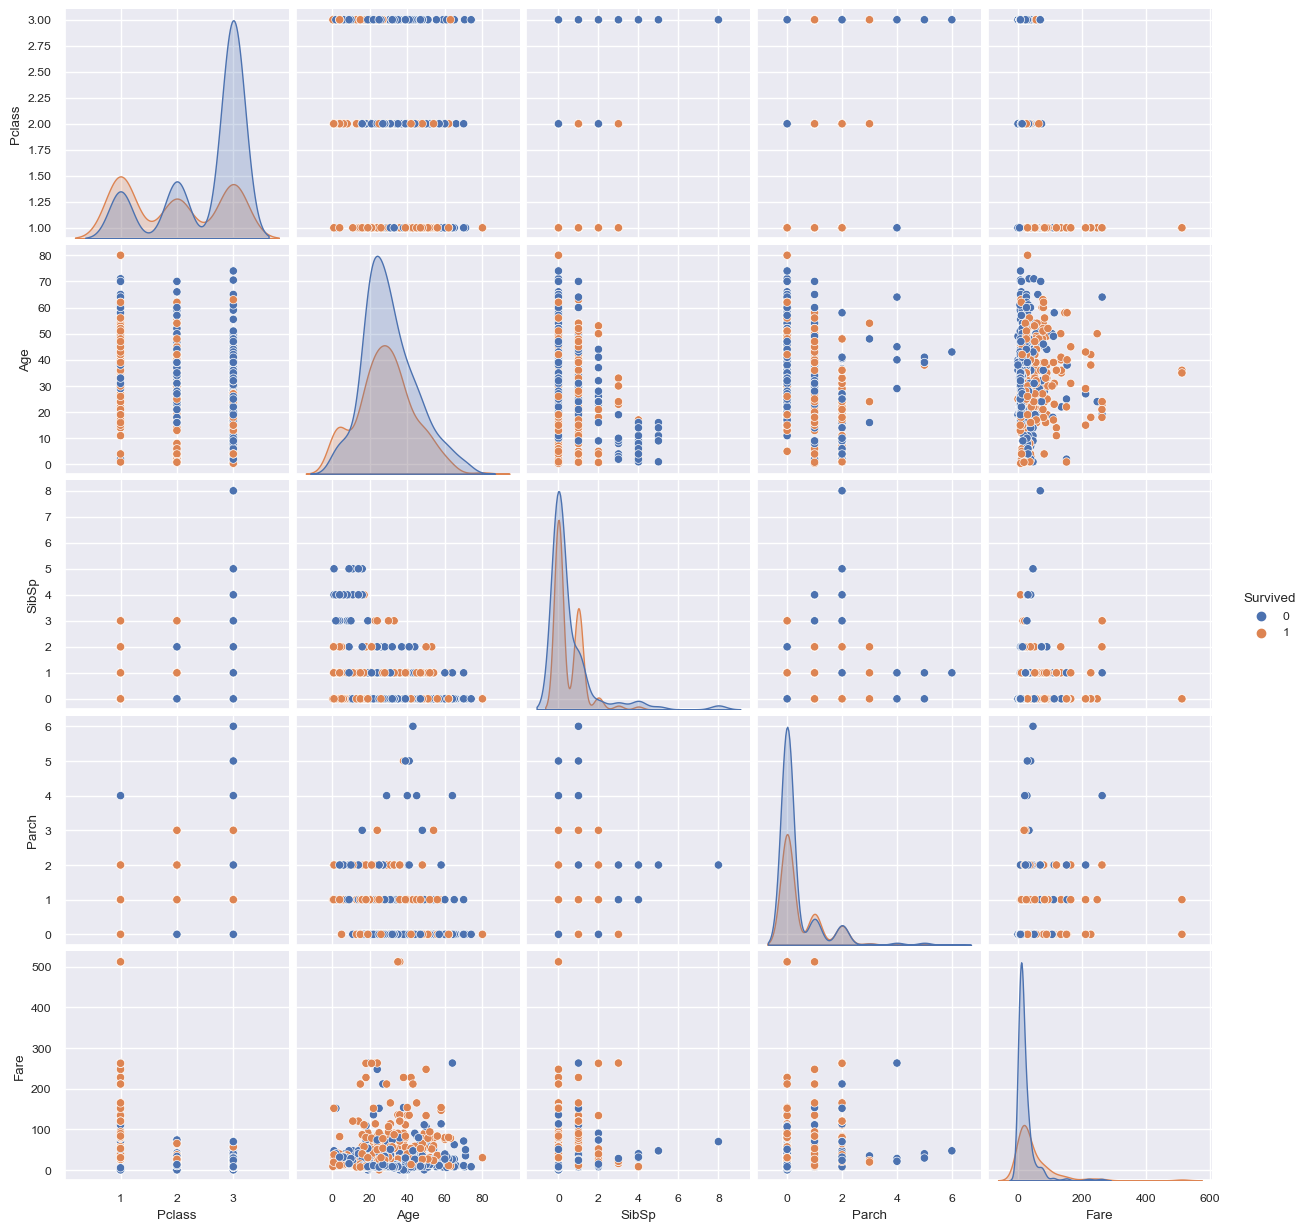

In [62]:
# Plotting pairplot to quickly visualise relationships among all pairs of variables
# Use the dataframe without typecasting survived as categorical to pass in 'Survived' as an arguement for hue
vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data=data_df_not_typecast, vars = vars, hue='Survived');

### For the KDE plot, we seem to have the values starting below zero, this seems to be because seaborn doesn't want to draw a vertical line from age 0. When we plot the KDE with a histogram in the next code cell using histplot, we can see there is no problem and that this is a perceptual issue.

### Most deaths occured for younger adults, with the peak in the early 20s. Young children were more likely to survive than for all other age groups. We shall compare between Sex in the next code cell.

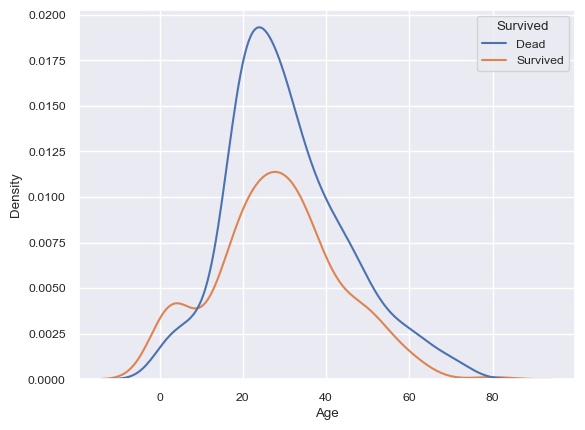

In [63]:
#kdeplot against age for Survived
sns.kdeplot(data=original_df, x='Age', hue="Survived");

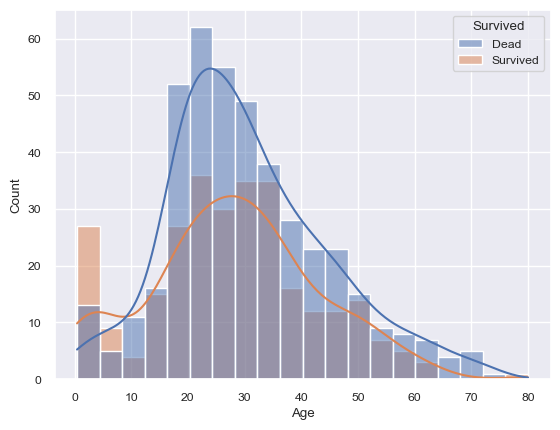

In [64]:
#histplot with kde to verify that extension of kde below age zero is not an error
sns.histplot(data=original_df, x='Age', hue="Survived",kde=True);

### Young male children and males around the age of 30 appear most frequently for survived. The only age where male survivors outnumber the dead is below the ages of 10 and above 70. Young males around the age of 20+ appear most frequently for dead. Female survivors of all ages outnumber the dead. This applies to the binwidth that was passed into seaborn.

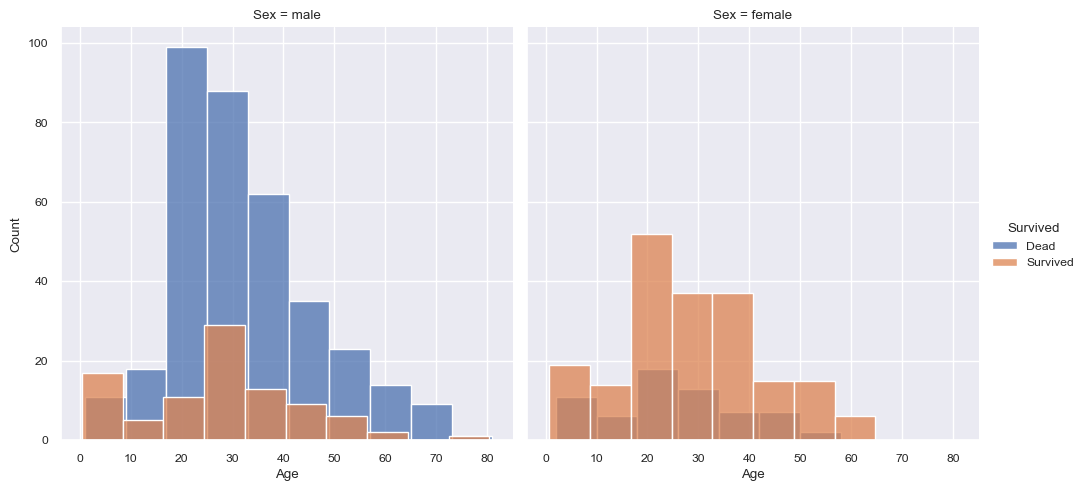

In [65]:
#Facetgrid for Age against Sex and Survived
plot = sns.FacetGrid(original_df, col='Sex', hue='Survived', height=5)
plot.map(sns.histplot, 'Age', binwidth = 8)
plot.add_legend();

### From our box and whisker plot, comparing males to females, the range of ages for males is larger than that of females. We have some survivors at the age of 80 for males, whereas the oldest female survivor is in her early 60s. There are no females above the age of 60 who died, whereas that is not true for males, with the oldest dead males at around the age of 75.

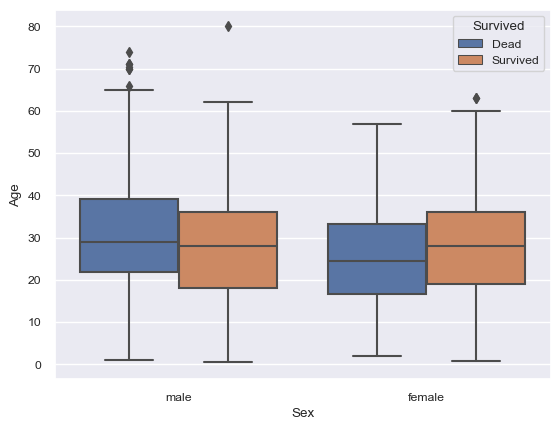

In [66]:
#Box and whisker plot for Sex and Age against Survived
sns.boxplot(data=original_df, x="Sex", y="Age", hue="Survived");

### Histogram is plotted as KDE plots by proportion (density), we cannot compare the areas of dead and survived against each other. From the kdeplot and histplot below (next 2 cells). We can conclude a few things. Females and males with 0 parents or children were the most likely to survive for their respective sex compared to other values of Parch. Females survivors outnumber dead for all values of Parch except for at a Parch value of 5. While for males, male dead outnumber survivors for all values of parch.

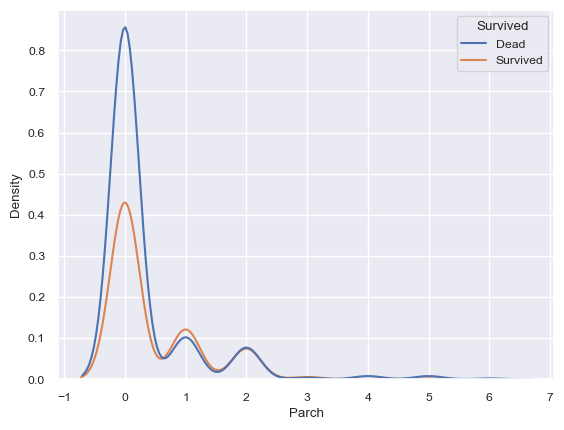

In [67]:
#Kde plot for Parents and children against Survived
sns.kdeplot(data=original_df, x='Parch', hue="Survived");

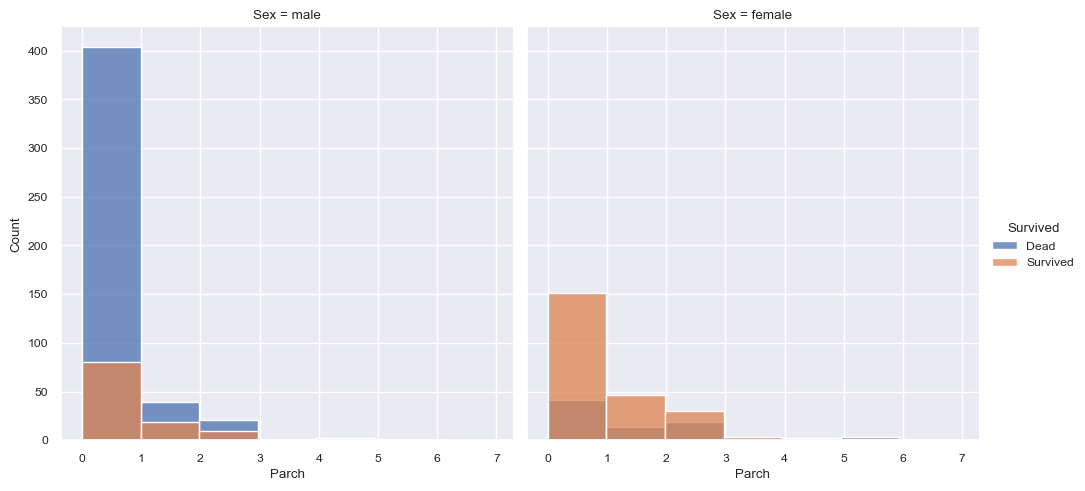

In [68]:
#Facet by Sex and Parch for Survived
plot = sns.FacetGrid(original_df, col='Sex', hue='Survived', height=5)
plot.map(sns.histplot, 'Parch', binwidth=0.99)
plot.add_legend();

### Histogram is plotted as KDE plots by proportion (density), we cannot compare the areas of dead and survived against each other. The majority of male and female survivors had at most 1 SibSp companion. We can make a few conclusions from this. Male and female survivors were either siblings or spouses. Unaccompanied (possibily single) females are the largest group of survivors and although the same is also true for unaccompanied male survivors, unaccompanied (and possibly single) males are the largest group of dead. The disparity between genders for 1 SibSp, means that wives were more likely to lose their husbands or brothers more than the other way round.

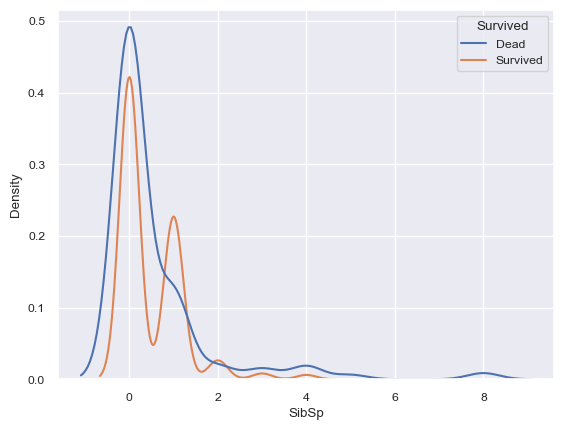

In [69]:
#Kde plot for Siblings and spouse against Survived
sns.kdeplot(data=original_df, x='SibSp', hue="Survived");

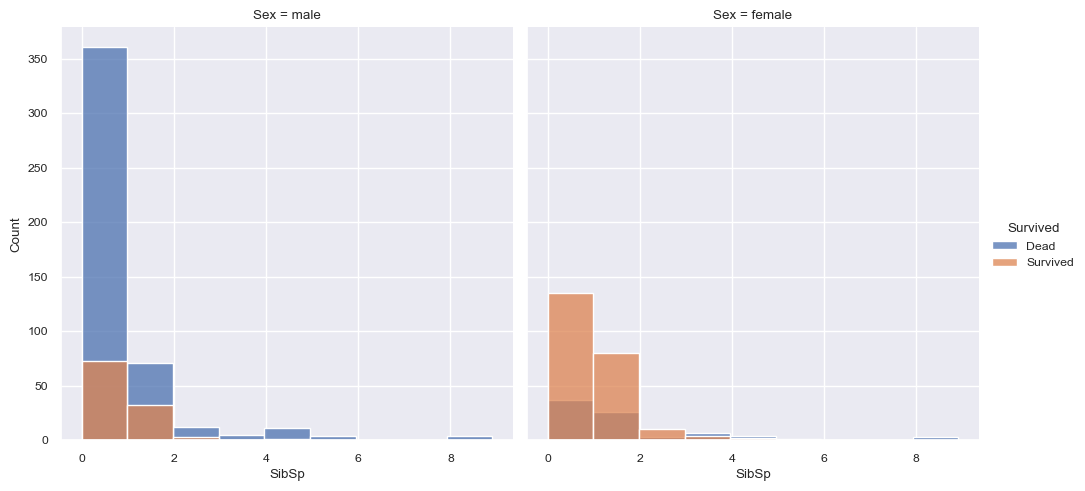

In [70]:
#Facet by Sex and SibSp for Survived
plot = sns.FacetGrid(original_df, col='Sex', hue='Survived', height=5)
plot.map(sns.histplot, 'SibSp', binwidth=0.99)
plot.add_legend();

### What can be concluded from the next 3 visualisations of kde, histogram and boxplot is:
### Even males with more expensive fares and hence first class cabins ended up dead but this is not true for females. Upperclass males died while upperclass females survived. In fact there are no male survivors with a fare above 200 except for an outlier(s) with a fare above 500. This is likely due to class attitudes at that time where gentlemen were not expected to be cowards. Interestingly, there is also a female outlier with a fare above 500. We can filter for fare >500 and determine if they are related or traveled together.

### The majority of dead came from Pclass_3 males (those with low fares). Pclass_3 females were more likely to die than females of other ages, but the survivors outnumber the dead

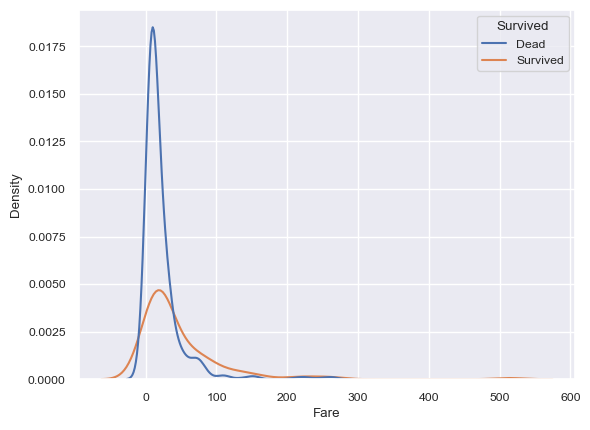

In [71]:
#Kdeplot for Fare against Survived
sns.kdeplot(data=original_df, x='Fare', hue="Survived");

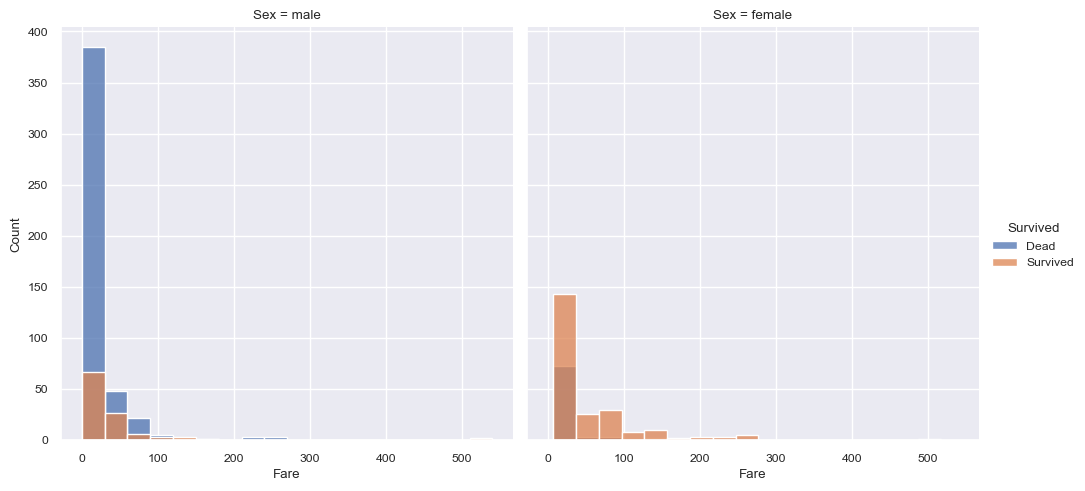

In [72]:
#Facet by Sex and Fare for Survived
plot = sns.FacetGrid(original_df, col='Sex', hue='Survived', height=5)
plot.map(sns.histplot, 'Fare', binwidth= 30)

plot.add_legend();

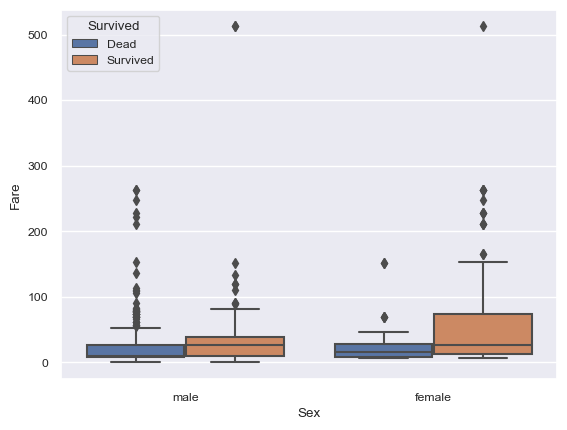

In [73]:
#Boxplot for Sex and Fare against Survived
sns.boxplot(data=original_df, x="Sex", y="Fare", hue="Survived");

In [74]:
#Determining the survivors with fare > 500
print(original_df['Fare'].max(), '\n')
print(original_df[original_df['Fare'] > 500], '\n')
print('The 3 passengers with the most expensive fares survived the voyage on the titanic')

512.3292 

     PassengerId  Survived   Pclass                                Name  \
258          259  Survived  Class_1                    Ward, Miss. Anna   
679          680  Survived  Class_1  Cardeza, Mr. Thomas Drake Martinez   
737          738  Survived  Class_1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin   Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN  Cherbourg  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55  Cherbourg  
737    male  35.0      0      0  PC 17755  512.3292         B101  Cherbourg   

The 3 passengers with the most expensive fares survived the voyage on the titanic


### From our correlation heatmap, pclass and fare have the largest r value, which is probably not surprising. The correlation is negative since a higher fare would correlate to a lower pclass (most expensive). SibSp and Parch have the 2nd largest r value. This could indicate that passengers traveled as family. The 3rd largest r value is age with pclass. This is negative which could indicate that older passengers were more likely to travel in lower pclass. The 4th largest r value is survived with pclass. The correlation is negative which could indicate that higher pclass (least expensive) were more likely to end up dead. The purpose of this correlation heatmap is to check for variables that are highly correlated with each other. This would not add any predictive value to a ML model and could potentially distort the model.

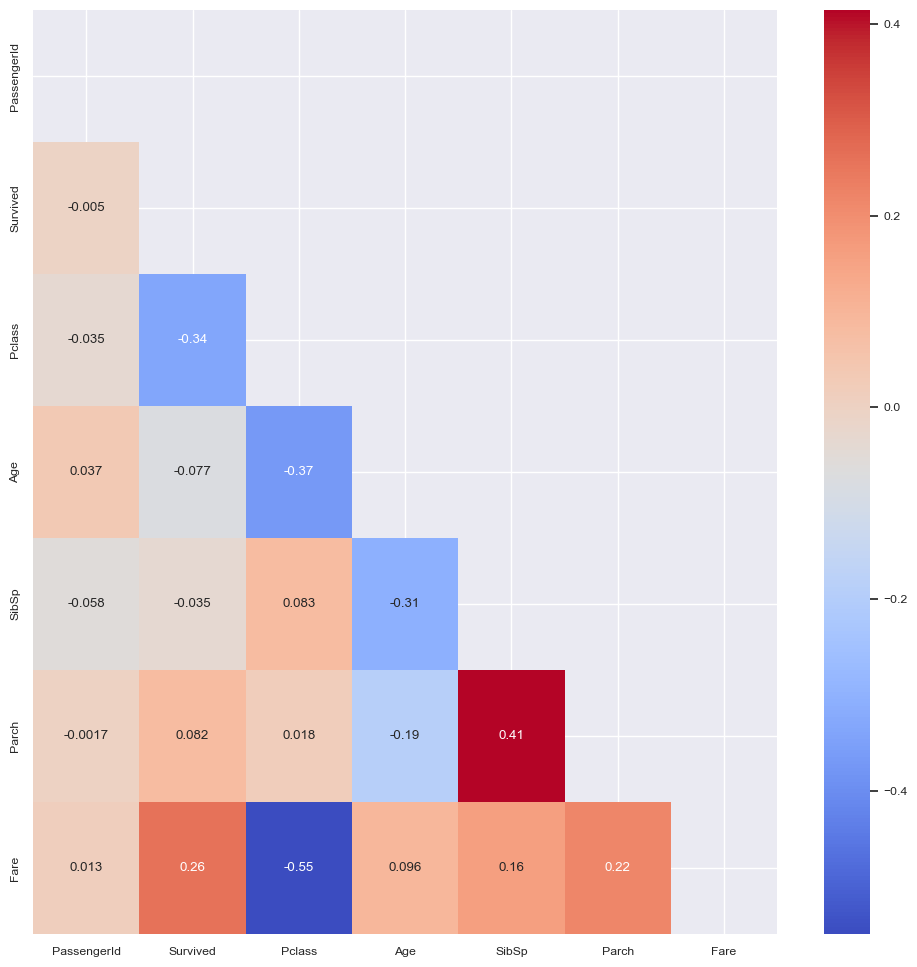

In [81]:
#create a correlation heatmap
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(data_df_not_typecast.corr(numeric_only=True)))
sns.heatmap(data_df_not_typecast.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask);

# Conclusion

### To survive on the titanic, be female, upperclass (pay a high fare) and around the age of 20 with no sibling/spouse or parent/child. To end up dead, be male, lowerclass (pay a low a fare) and around the age of 20-30 with no sibling/spouse or parent/child.